In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [3]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [4]:
housing = fetch_california_housing()

In [6]:
print(housing.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

In [15]:
x = pd.DataFrame(housing.data, columns=housing.feature_names)
x.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [16]:
y = pd.DataFrame(housing.target,columns=['target'])
y.head()

,target
0,4.526
1,3.585
2,3.521
3,3.413
4,3.422


In [18]:
x.drop(["Latitude",'Longitude'], axis=1, inplace=True)

In [23]:
X_train_full, X_test, y_train_full, y_test = train_test_split(x,y, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, random_state=42)

In [28]:
print(X_train_full.shape)
print(X_test.shape)
print(X_train.shape)
print(X_valid.shape)

(15480, 6)
(5160, 6)
6
(3870, 6)


In [30]:
LAYERS = [
    tf.keras.layers.Dense(30, activation="relu", input_shape = X_train.shape[1:]),
    tf.keras.layers.Dense(10, activation="relu"),
    tf.keras.layers.Dense(5, activation="relu"),
    tf.keras.layers.Dense(1)
]

In [31]:
model = tf.keras.models.Sequential(LAYERS)

In [32]:
LOSS ="mse"
OPTIMIZER ="sgd"

model.compile(optimizer= OPTIMIZER, loss= LOSS)

In [33]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 30)                210       
                                                                 
 dense_4 (Dense)             (None, 10)                310       
                                                                 
 dense_5 (Dense)             (None, 5)                 55        
                                                                 
 dense_6 (Dense)             (None, 1)                 6         
                                                                 
Total params: 581 (2.27 KB)
Trainable params: 581 (2.27 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [34]:
scaler = StandardScaler()

In [35]:
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [36]:
EPOCHS = 20

history = model.fit(X_train, y_train, epochs=EPOCHS, validation_data=(X_valid, y_valid))

Epoch 1/20
363/363 [==============================] - 4s 6ms/step - loss: 0.7419 - val_loss: 0.5011
Epoch 2/20
363/363 [==============================] - 2s 5ms/step - loss: 0.5131 - val_loss: 0.4663
Epoch 3/20
363/363 [==============================] - 2s 5ms/step - loss: 0.4893 - val_loss: 0.4674
Epoch 4/20
363/363 [==============================] - 2s 5ms/step - loss: 0.4745 - val_loss: 0.4785
Epoch 5/20
363/363 [==============================] - 2s 5ms/step - loss: 0.4673 - val_loss: 0.4739
Epoch 6/20
363/363 [==============================] - 2s 6ms/step - loss: 0.4606 - val_loss: 0.4926
Epoch 7/20
363/363 [==============================] - 2s 6ms/step - loss: 0.4548 - val_loss: 0.4820
Epoch 8/20
363/363 [==============================] - 2s 5ms/step - loss: 0.4519 - val_loss: 0.4913
Epoch 9/20
363/363 [==============================] - 2s 5ms/step - loss: 0.4482 - val_loss: 0.4745
Epoch 10/20
363/363 [==============================] - 2s 6ms/step - loss: 0.4449 - val_loss: 0.4706

<Axes: >

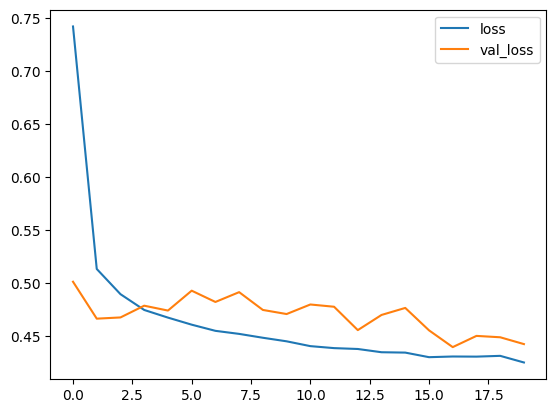

In [39]:
pd.DataFrame(history.history).plot()

In [40]:
new = X_test[0]

In [41]:
new

array([-1.15780104, -0.28673138, -0.49550877, -0.16618097, -0.02946012,
        0.38899735])

In [43]:
new.reshape((1,6)).shape # one shape = 1x6, 

(1, 6)

In [45]:
model.predict(new.reshape((1,6)))

1/1 [==============================] - 0s 145ms/step


array([[0.93748677]], dtype=float32)

## MODEL with Call Back

In [46]:
model_2 = tf.keras.models.Sequential(LAYERS)

LOSS= "mse"
OPTIMIZER = tf.keras.optimizers.SGD(learning_rate=1e-3)

model_2.compile(loss=LOSS, optimizer=OPTIMIZER)

EPOCHS = 20

checkpoint_cb = tf.keras.callbacks.ModelCheckpoint("my_keras_model.h5", save_best_only=True)
early_stopping_cb = tf.keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True)
tensorboard_cb = tf.keras.callbacks.TensorBoard(log_dir="logs")

CALLBACKS = [checkpoint_cb, early_stopping_cb, tensorboard_cb]

history = model_2.fit(X_train, y_train, epochs= EPOCHS, validation_data=(X_valid, y_valid), callbacks=CALLBACKS)

Epoch 1/20
361/363 [============================>.] - ETA: 0s - loss: 0.4234

C:\Python310\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


363/363 [==============================] - 4s 8ms/step - loss: 0.4230 - val_loss: 0.4371
Epoch 2/20
363/363 [==============================] - 3s 8ms/step - loss: 0.4209 - val_loss: 0.4426
Epoch 3/20
363/363 [==============================] - 3s 8ms/step - loss: 0.4200 - val_loss: 0.4474
Epoch 4/20
363/363 [==============================] - 2s 6ms/step - loss: 0.4194 - val_loss: 0.4516
Epoch 5/20
363/363 [==============================] - 3s 7ms/step - loss: 0.4187 - val_loss: 0.4551
Epoch 6/20
363/363 [==============================] - 3s 8ms/step - loss: 0.4182 - val_loss: 0.4582
